In [1]:
import matplotlib.pyplot as plt

from multiple_hidden_nodes import experiment as exp
from common import *
import numpy as np

# Simple recurrent network, multiple hidden nodes

Here I train a RNN with multiple hidden nodes on a scalar time-series. The model is trained to predict value $x^t$ on the basis of all previous timepoints $x^{0\dots t-1}$. The data is a sine-like sequence.

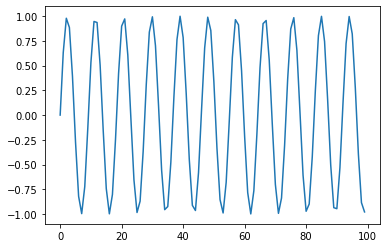

In [2]:
numT = 100

data = np.sin(np.arange(0, numT+1)*(2*np.pi*11)/(numT+1))
x = data[0:-1]
y = data[1:]

plt.figure()
plt.plot(x)

## Training

In [3]:
numN = 5000

In [4]:
cfg0 = Cfg()
cfg0.numT = numT
cfg0.numK = 5
cfg0.numN = numN
cfg0.alpha = 0.3
cfg0.feedback_epoch = 250

log = exp.run(cfg0, x, y)   

Finished 0/5000
Finished 250/5000
Finished 500/5000
Finished 750/5000
Finished 1000/5000
Finished 1250/5000
Finished 1500/5000
Finished 1750/5000
Finished 2000/5000
Finished 2250/5000
Finished 2500/5000
Finished 2750/5000
Finished 3000/5000
Finished 3250/5000
Finished 3500/5000
Finished 3750/5000
Finished 4000/5000
Finished 4250/5000
Finished 4500/5000
Finished 4750/5000


## Mean squared error

Text(0, 0.5, 'log MSE')

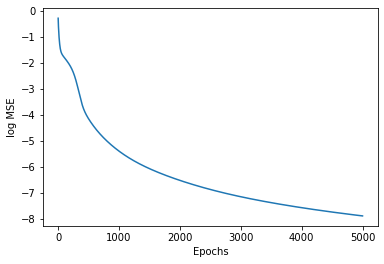

In [5]:
plt.figure()
plt.plot(np.log(log.mse))
plt.xlabel("Epochs")
plt.ylabel("log MSE")

## Predicted data $\hat{y}$ and training data $x$ over time
From the final epoch

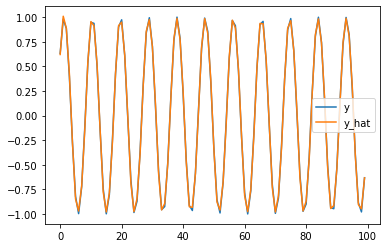

In [6]:
plt.figure()
plt.plot(y)
plt.plot(log.y_hat[cfg0.numN-1])
plt.legend(['y','y_hat'])

## Evolution of parameters

Text(0.5, 0, 'Epochs')

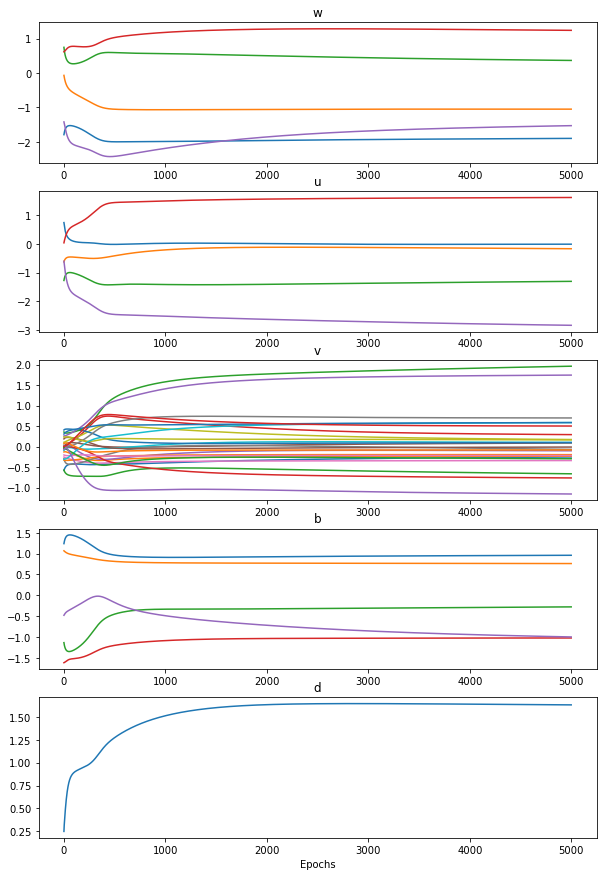

In [7]:
plt.figure(figsize=(10, 15))
plt.subplot(5, 1, 1); plt.plot(log.w.reshape((numN, -1))); plt.title("w");
plt.subplot(5, 1, 2); plt.plot(log.u.reshape((numN, -1))); plt.title("u");
plt.subplot(5, 1, 3); plt.plot(log.v.reshape((numN, -1))); plt.title("v");
plt.subplot(5, 1, 4); plt.plot(log.b.reshape((numN, -1))); plt.title("b");
plt.subplot(5, 1, 5); plt.plot(log.d.reshape((numN, -1))); plt.title("d");
plt.xlabel("Epochs")

# Validation

To validate the training of the model, we'll also train a model in which the recurrent weights $v$ are fixed to 0.

In [8]:
cfg0_null = Cfg()
cfg0_null.numT = cfg0.numT
cfg0_null.numN = cfg0.numN
cfg0_null.numK = cfg0.numK
cfg0_null.alpha = cfg0.alpha
cfg0_null.feedback_epoch = cfg0.feedback_epoch

# Parameter v is fixed to 0
cfg0_null.v0 = np.zeros((cfg0.numK, cfg0.numK))
cfg0_null.fix_v = True

log_h0 = exp.run(cfg0_null, x, y)

Finished 0/5000
Finished 250/5000
Finished 500/5000
Finished 750/5000
Finished 1000/5000
Finished 1250/5000
Finished 1500/5000
Finished 1750/5000
Finished 2000/5000
Finished 2250/5000
Finished 2500/5000
Finished 2750/5000
Finished 3000/5000
Finished 3250/5000
Finished 3500/5000
Finished 3750/5000
Finished 4000/5000
Finished 4250/5000
Finished 4500/5000
Finished 4750/5000


## Mean squared error

The full model with recurrent weights is better able to predict the data than the null-model without recurrent weight:

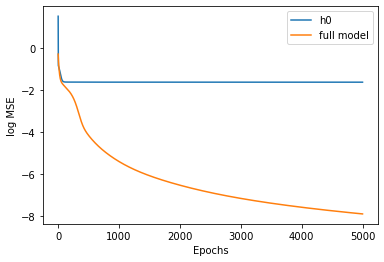

In [9]:
plt.figure()
plt.plot(np.log(log_h0.mse))
plt.plot(np.log(log.mse))
plt.xlabel("Epochs")
plt.ylabel("log MSE")
plt.legend(['h0', 'full model'])

## Predicted data $\hat{y}$ and training data $x$ scatter plot

If the model's prediction is influenced by its internal state, then for a given $x$ it should be able to output more than one prediction $\hat{y}$.

This is indeed the case for full the model:

Text(0, 0.5, '$\\hat{y}$')

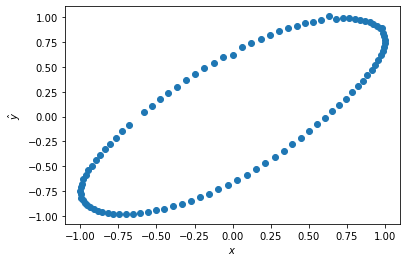

In [10]:
plt.figure()
plt.scatter(x, log.y_hat[numN-1])
plt.xlabel("$x$")
plt.ylabel("$\hat{y}$")

But not for the null model:

Text(0, 0.5, '$\\hat{y}$')

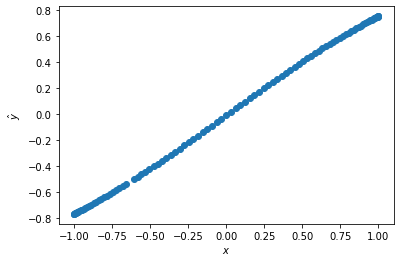

In [11]:
plt.figure()
plt.scatter(x, log_h0.y_hat[numN-1])
plt.xlabel("$x$")
plt.ylabel("$\hat{y}$")

## Comparison to single hidden node script

In [34]:
from single_hidden_node import experiment as exp1
from multiple_hidden_nodes import experiment as exp2

If the multiple hidden nodes model is implemented correctly, then running it with `numK = 1` should give the same result as the model from single_hidden_node. They are initialized with the same initial parameters.

In [35]:
w0 = np.random.randn(1)
b0 = np.random.randn(1)
v0 = np.random.randn(1)
u0 = np.random.randn(1)
d0 = np.random.randn(1)

In [36]:
# Model 1 - single hidden node
cfg1 = Cfg()
cfg1.numT = numT
cfg1.numN = numN
cfg1.alpha = 0.3
cfg1.w0 = np.copy(w0)
cfg1.b0 = np.copy(b0)
cfg1.v0 = np.copy(v0)
cfg1.u0 = np.copy(u0)
cfg1.d0 = np.copy(d0)
cfg1.feedback_epoch = 250

log1 = exp1.run(cfg1, x, y)   

Finished 0/5000
Finished 250/5000
Finished 500/5000
Finished 750/5000
Finished 1000/5000
Finished 1250/5000
Finished 1500/5000
Finished 1750/5000
Finished 2000/5000
Finished 2250/5000
Finished 2500/5000
Finished 2750/5000
Finished 3000/5000
Finished 3250/5000
Finished 3500/5000
Finished 3750/5000
Finished 4000/5000
Finished 4250/5000
Finished 4500/5000
Finished 4750/5000


In [38]:
# Model 2 - multiple hidden nodes, numK = 1
cfg2 = Cfg()
cfg2.numT = numT
cfg2.numN = numN
cfg2.numK = 1
cfg2.w0 = np.copy(w0)
cfg2.b0 = np.copy(b0)
cfg2.v0 = np.copy(v0)[None, None]
cfg2.u0 = np.copy(u0)
cfg2.d0 = np.copy(d0)
cfg2.alpha = 0.3
cfg2.feedback_epoch = 250

log2 = exp2.run(cfg2, x, y)   

Finished 0/5000
Finished 250/5000
Finished 500/5000
Finished 750/5000
Finished 1000/5000
Finished 1250/5000
Finished 1500/5000
Finished 1750/5000
Finished 2000/5000
Finished 2250/5000
Finished 2500/5000
Finished 2750/5000
Finished 3000/5000
Finished 3250/5000
Finished 3500/5000
Finished 3750/5000
Finished 4000/5000
Finished 4250/5000
Finished 4500/5000
Finished 4750/5000


## Mean squared error

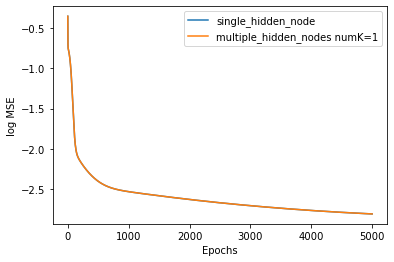

In [39]:
plt.figure()
plt.plot(np.log(log1.mse))
plt.plot(np.log(log2.mse))
plt.xlabel("Epochs")
plt.ylabel("log MSE")
plt.legend(['single_hidden_node', 'multiple_hidden_nodes numK=1'])

## Final parameters

Single hidden node model:

In [40]:
print(f'w: {log1.w[numN-1]}')
print(f'b: {log1.b[numN-1]}')
print(f'v: {log1.v[numN-1]}')
print(f'u: {log1.u[numN-1]}')
print(f'd: {log1.d[numN-1]}')

w: 3.9717272052974595
b: 3.153913257551427
v: -5.40130469201535
u: 2.309739504307541
d: -1.2487410779296753


Multiple hidden nodes model:

In [41]:
print(f'w: {log2.w[numN-1]}')
print(f'b: {log2.b[numN-1]}')
print(f'v: {log2.v[numN-1]}')
print(f'u: {log2.u[numN-1]}')
print(f'd: {log2.d[numN-1]}')

w: [3.97172721]
b: [3.15391326]
v: [[-5.40130469]]
u: [2.3097395]
d: -1.2487410779296744


## Conclusion
The identical MSE and parameters between the two models gives me confidence in their implementations.